In [1]:
import numpy as np 
import random
import matplotlib.pyplot as plt
import math
from mpl_toolkits import mplot3d

%matplotlib inline
random.seed(123) # Works same every time we run

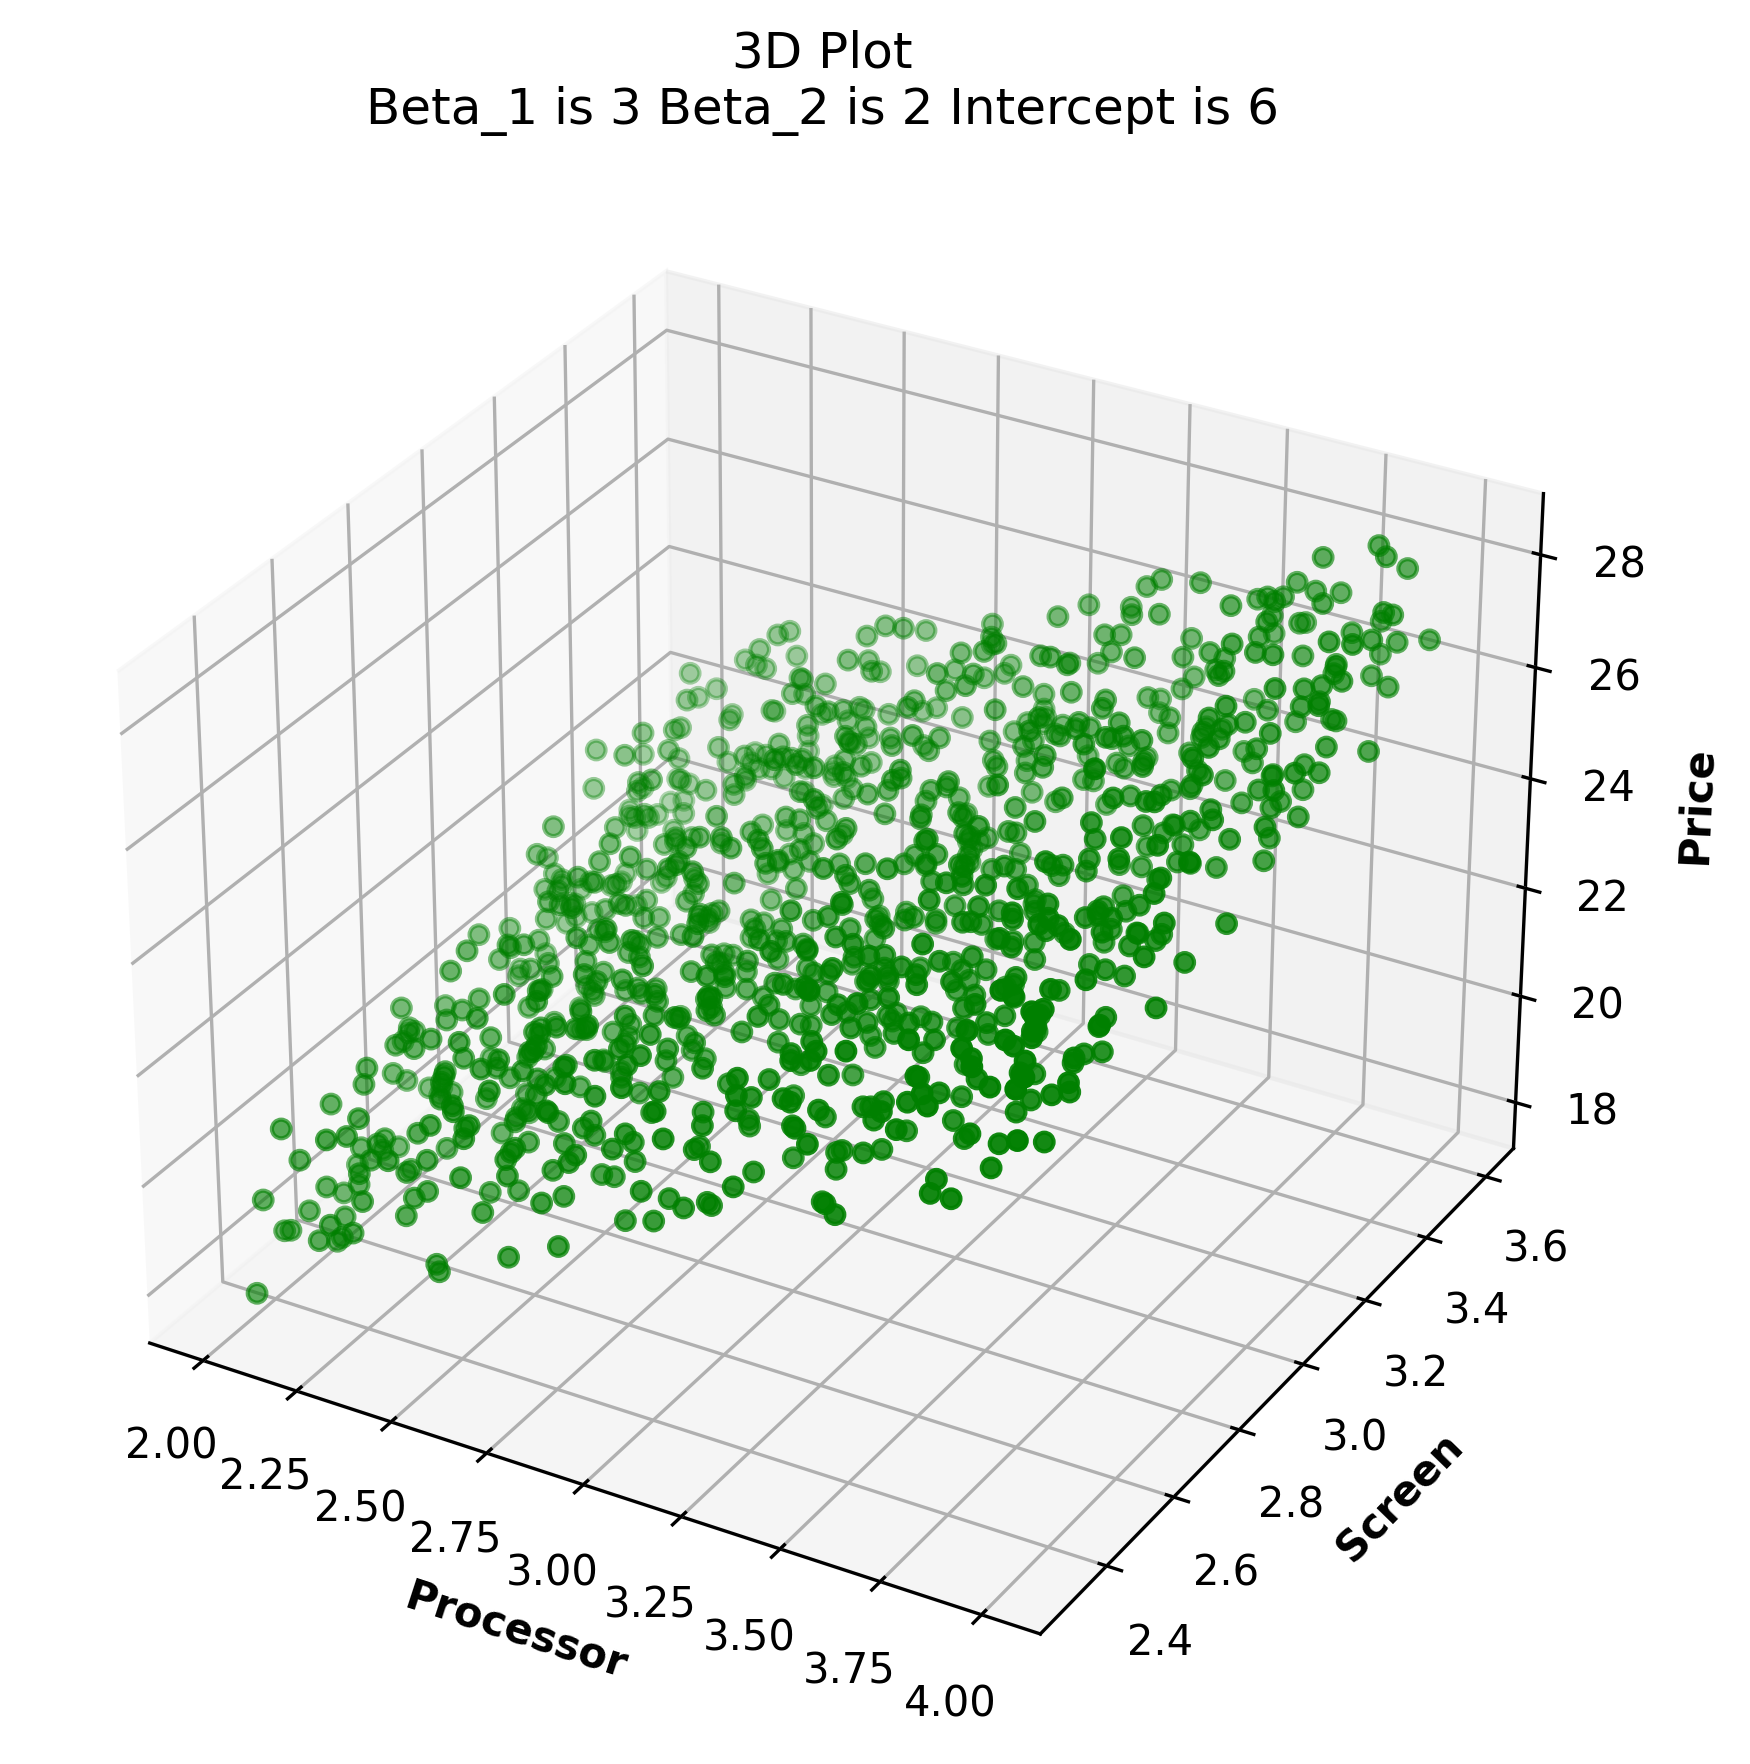

In [2]:
processor = np.random.uniform(2,4,1000) # Processor
screen = np.random.uniform(2.3,3.6,1000) # Screen
randomness = np.random.uniform(1,4,1000)
beta_1 = 3
beta_2 = 2
intercept = 6
y = intercept + beta_1*processor + beta_2*screen + randomness
fig = plt.figure(figsize = (14, 7),dpi=300)
ax = plt.axes(projection ="3d")
 
# Creating plot
ax.scatter3D(processor, screen, y, color = "green")
plt.title(f"3D Plot\nBeta_1 is {beta_1} Beta_2 is {beta_2} Intercept is {intercept}")
ax.set_xlabel('Processor', fontweight ='bold') 
ax.set_ylabel('Screen', fontweight ='bold') 
ax.set_zlabel('Price', fontweight ='bold')
# plt.savefig("3DPlot.png", dpi=300,bbox_inches='tight')
plt.show()

435.31
344.74
273.08
216.36
171.48
135.97
107.87
85.63
68.03
54.11
43.09
34.37
27.47
22.01
17.69
14.27
11.56
9.42
7.72
6.38
5.32
4.48
3.81
3.29
2.87
2.54
2.28
2.07
1.91
1.78
1.67
1.59
1.53
1.48
1.43
1.40
1.38
1.35
1.34
1.32
1.31
1.30
1.30
1.29
1.29
1.28
1.28
1.28
1.27
1.27
1.27
1.27
1.27
1.26
1.26
1.26
1.26
1.26
1.26
1.26
1.26
1.25
1.25
1.25
1.25
1.25
1.25
1.25
1.25
1.25
1.25
1.24
1.24
1.24
1.24
1.24
1.24
1.24
1.24
1.24
1.24
1.23
1.23
1.23
1.23
1.23
1.23
1.23
1.23
1.23
1.23
1.22
1.22
1.22
1.22
1.22
1.22
1.22
1.22
1.22
Best possible beta 1 3.671644771805242
Best possible beta 2 3.5113319603155255
Best possible intercept 1.93
Final Error is 1.22


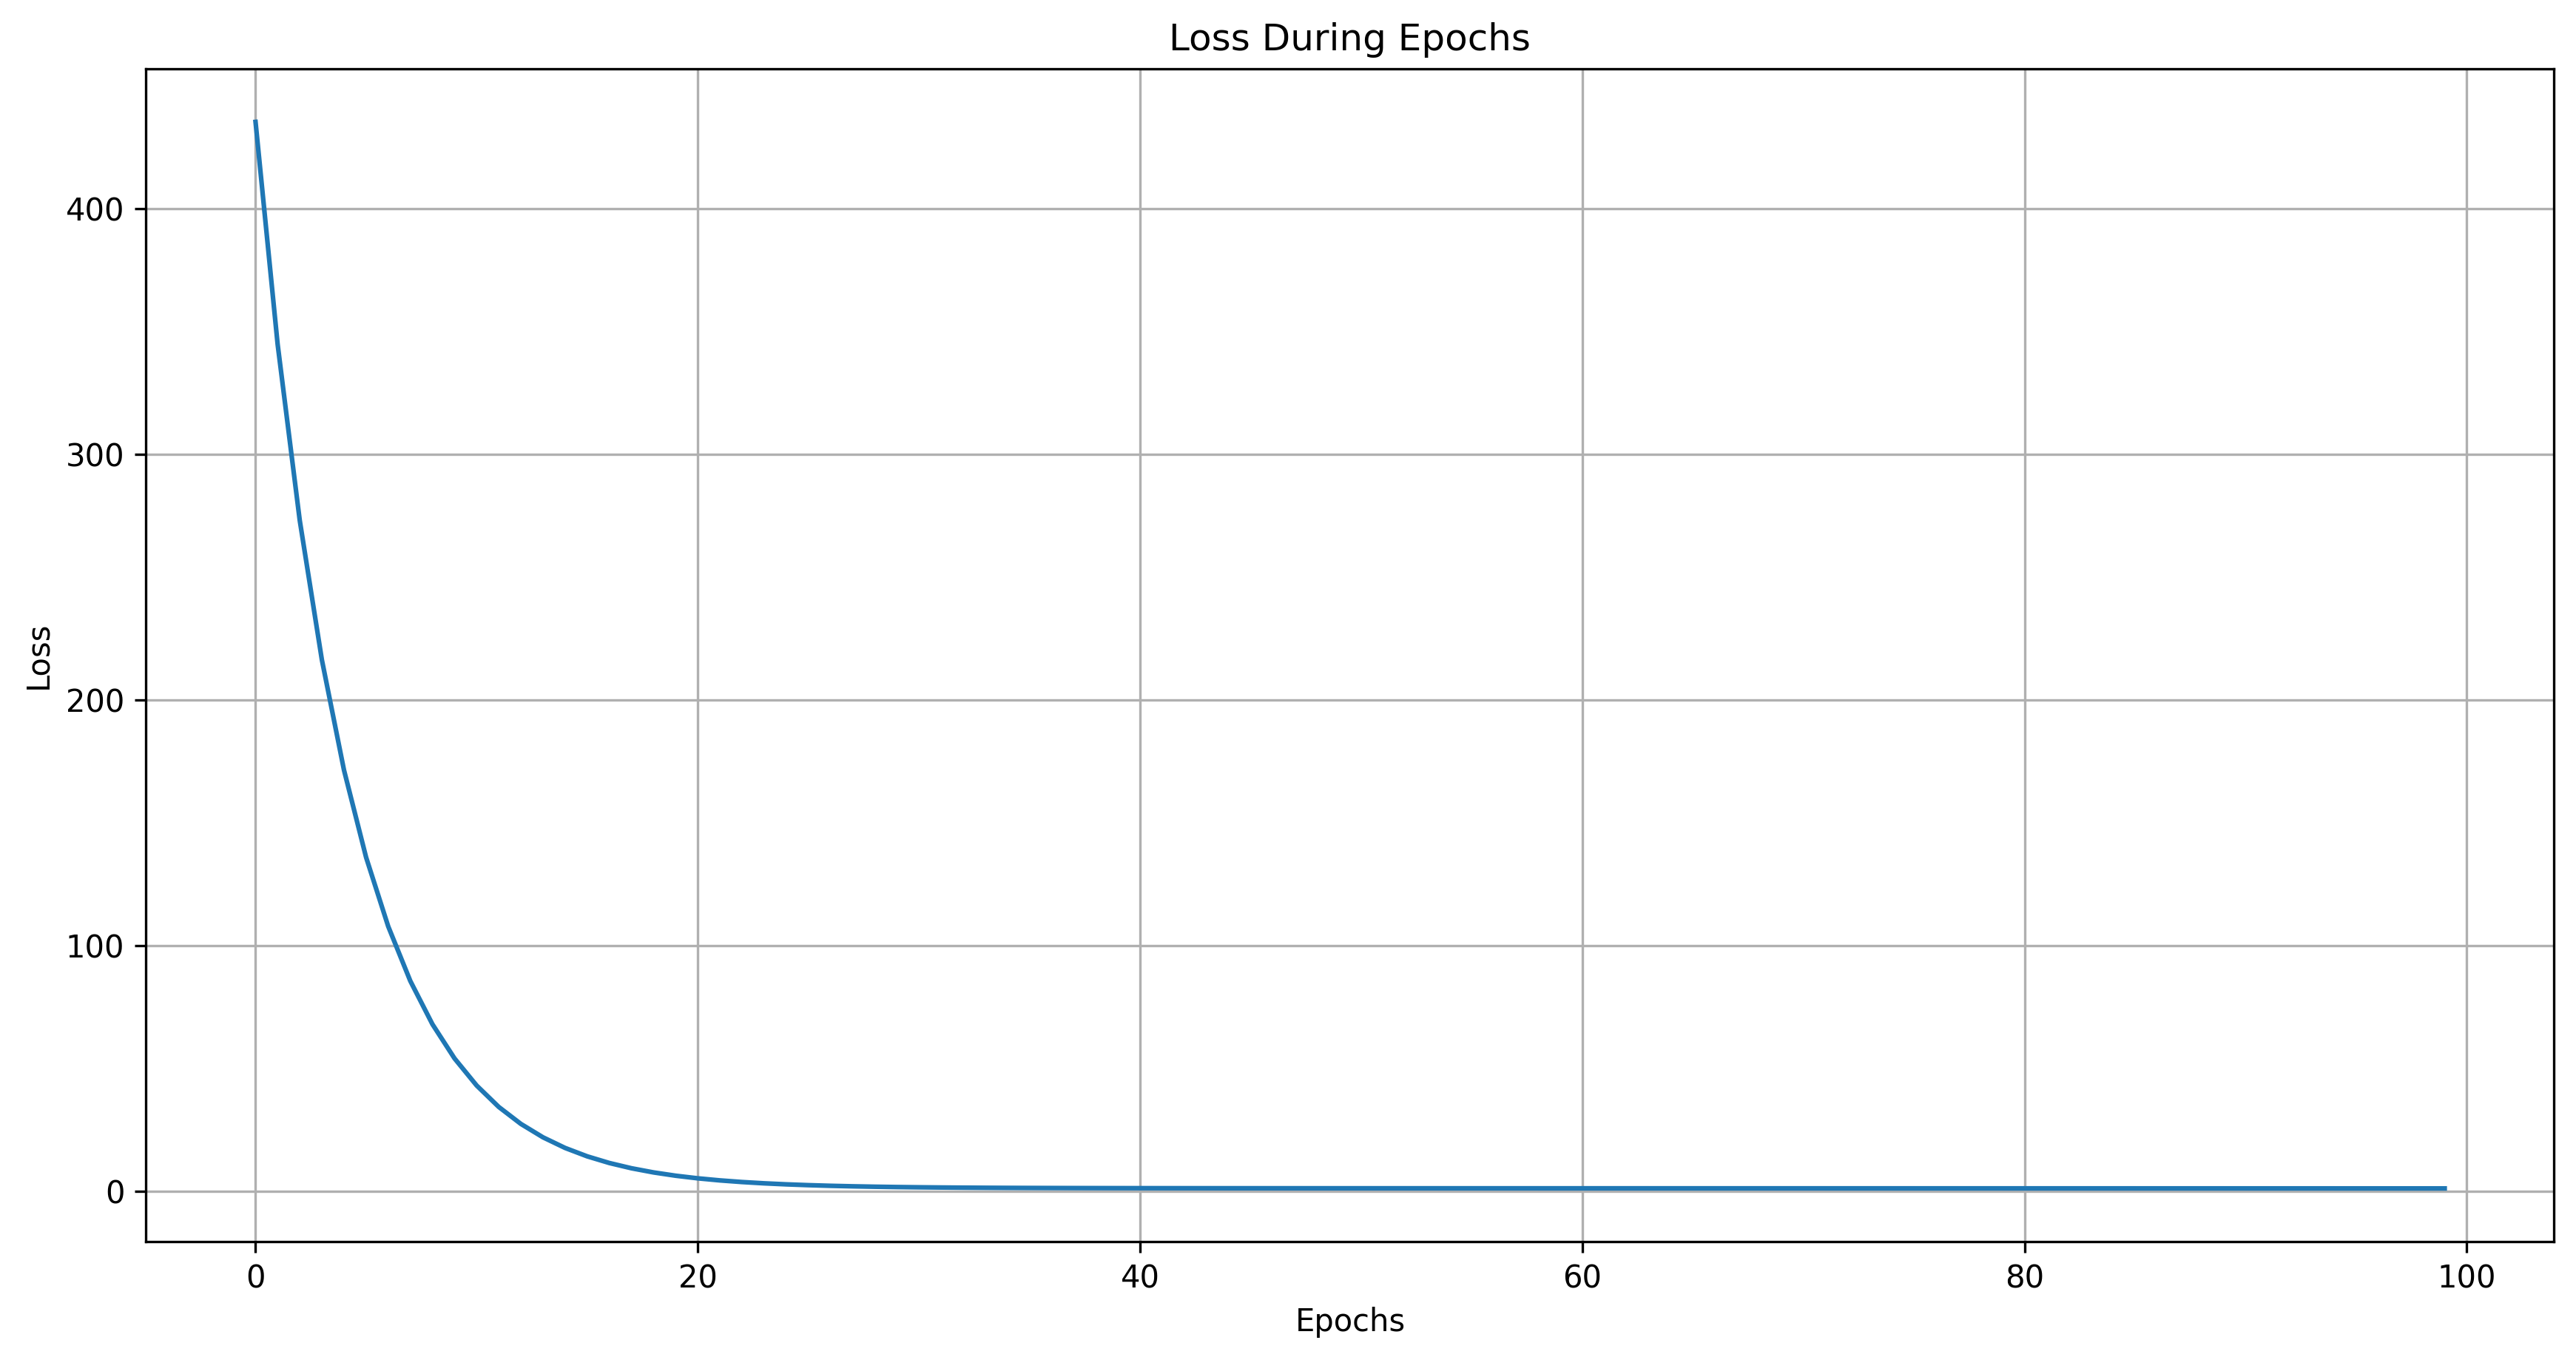

In [3]:
def mean_squared_error(y_true,y_pred):
    return ((y_true-y_pred)**2).sum()/len(y_true)

def optimizer(b_1,b_2,intercept,independent_1,independent_2,dependent,learning_rate):  
    
    gradient_for_b_1=0
    gradient_for_b_2=0
    gradient_for_intercept = 0
    
    number_of_points = len(dependent)
    
    for i in range(0,number_of_points):
    
        const = (dependent[i] - (intercept+(b_1*independent_1[i])+(b_2*independent_2[i])))
        gradient_for_b_1+= (const  * independent_1[i]) 
        gradient_for_b_2+= (const  * independent_2[i])
        gradient_for_intercept+= const
        
    # Normalize the gradients
    gradient_for_b_1 = (-2/number_of_points) * gradient_for_b_1
    gradient_for_b_2 = (-2/number_of_points) * gradient_for_b_2
    gradient_for_intercept = (-2/number_of_points) * gradient_for_intercept
        
    b_1       =       b_1 - (learning_rate * (gradient_for_b_1))
    
    b_2       =       b_2 - (learning_rate * (gradient_for_b_2))
    
    intercept =       intercept - (learning_rate* gradient_for_intercept)
                                    
    return b_1,b_2,intercept

number_of_epochs=100
learning_rate = 0.05
b_1,b_2,intercept=0,0,0
errors = []
for e in range(0,number_of_epochs):
    b_1,b_2,intercept = optimizer(b_1,b_2,intercept,processor,screen,y,learning_rate)
    errors.append(mean_squared_error(y,b_1*processor+b_2*screen+intercept))
    print(f'{mean_squared_error(y,b_1*processor+b_2*screen+intercept):.2f}')
print(f"Best possible beta 1 {b_1}")
print(f"Best possible beta 2 {b_2}")
print(f"Best possible intercept {intercept:.2f}")
print(f"Final Error is {errors[-1]:.2f}")

fig = plt.figure(figsize = (14, 7),dpi=300)

 
# Creating plot

plt.title(f"Loss During Epochs")
plt.plot(range(0,number_of_epochs),errors)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.grid(True)
# plt.savefig("Multiple_Linear_Regression_Loss.png", dpi=300,bbox_inches='tight')
plt.show()

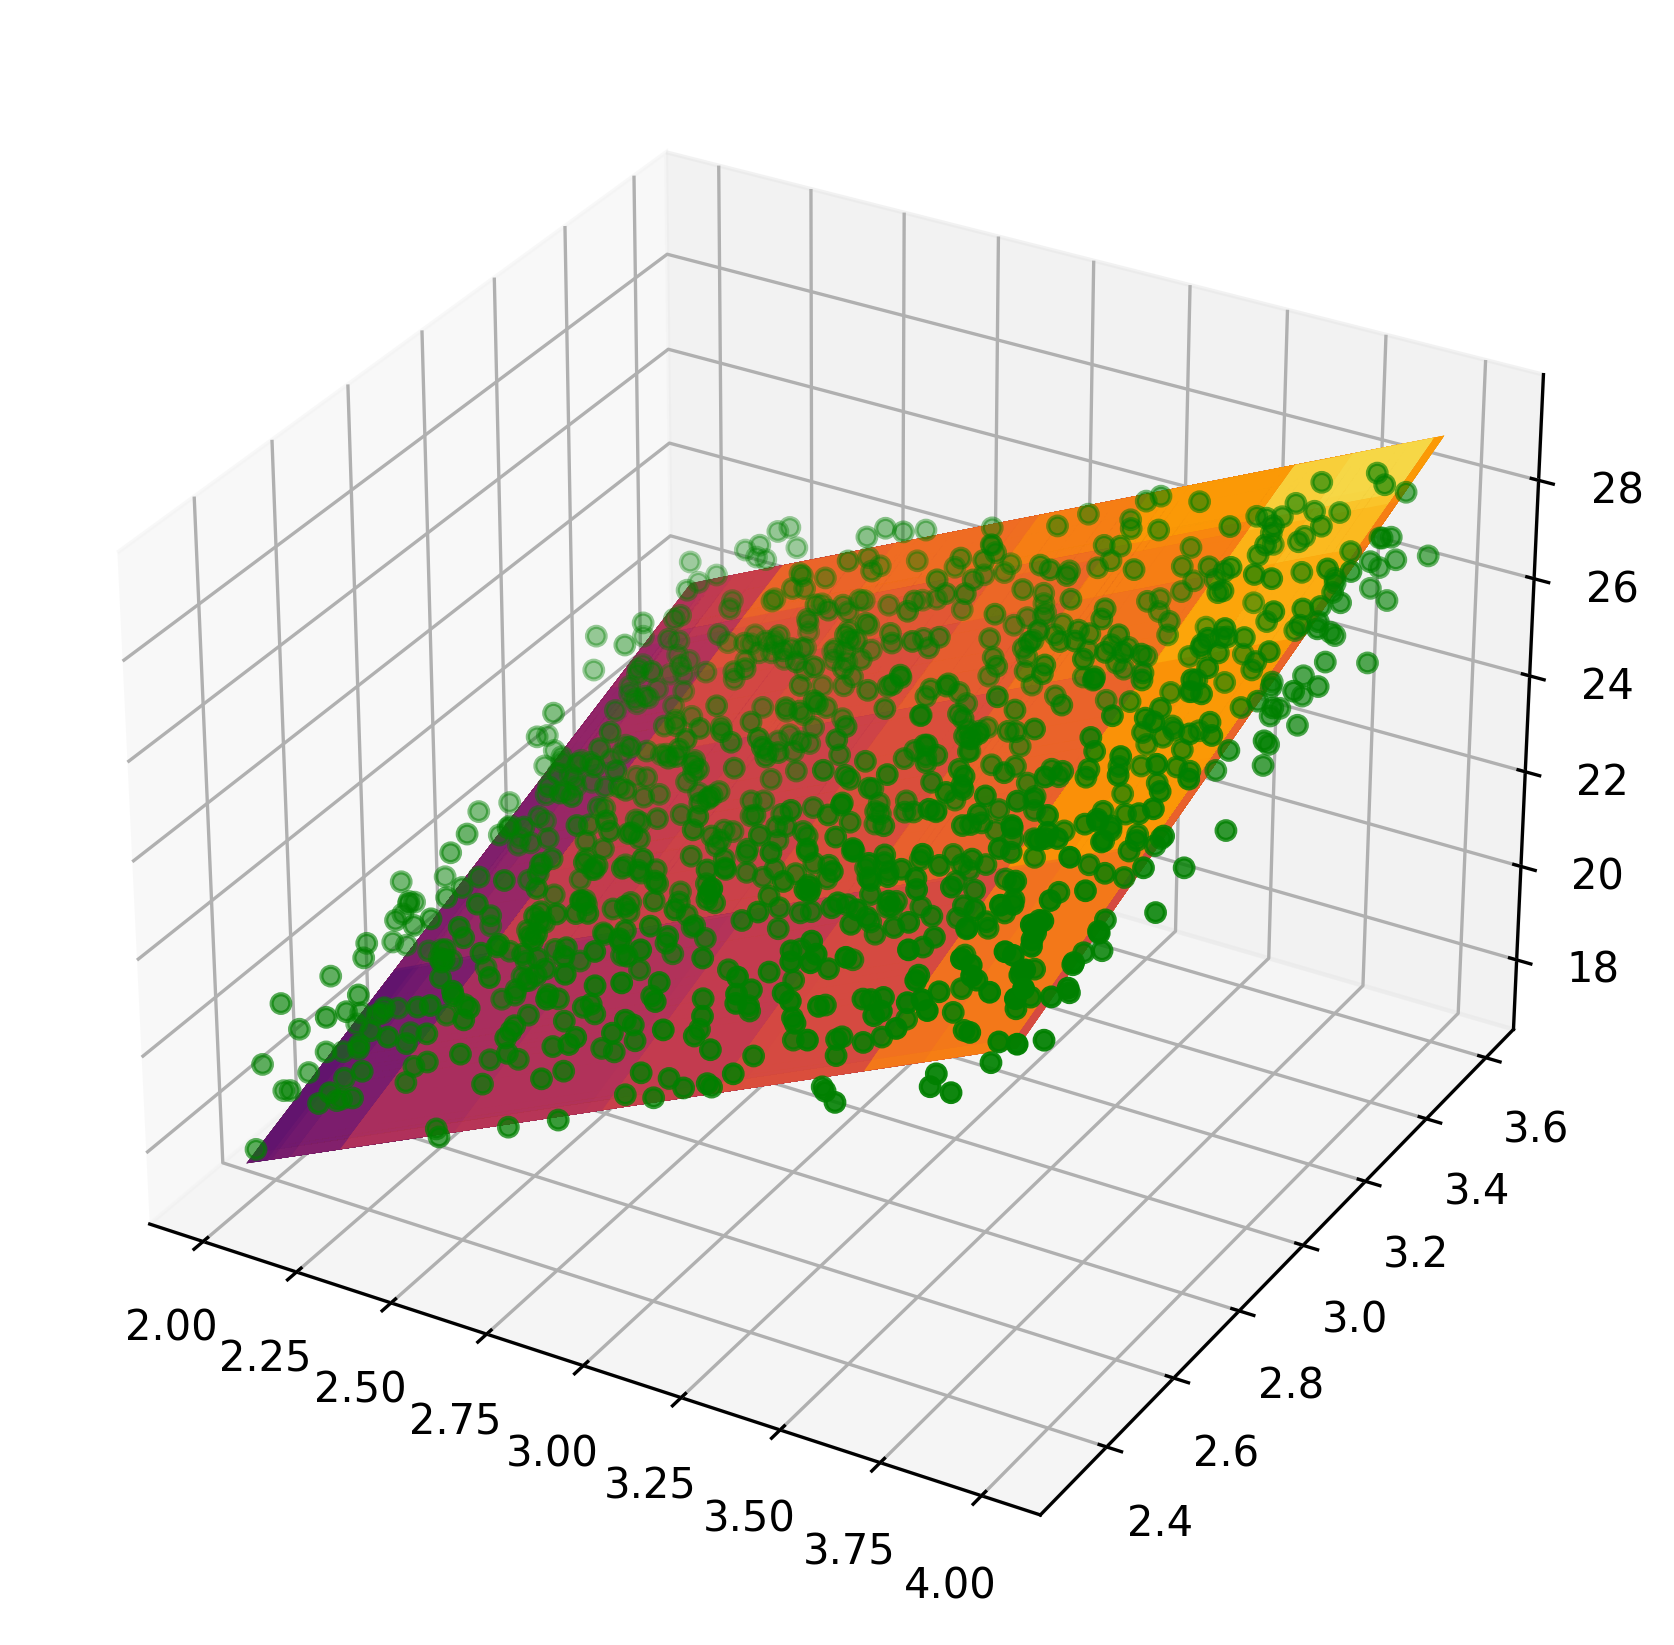

In [4]:
x_1, y_1 = np.meshgrid(processor, screen)
z = b_1*x_1+b_2*y_1+intercept
# Create the figure
fig = plt.figure(figsize = (14, 7),dpi=300)

# Add an axes
ax = fig.add_subplot(111,projection='3d')

# plot the surface
ax.plot_surface(x_1, y_1, z, cmap='inferno', edgecolor='none')
ax.scatter(processor, screen, y, color = "green")
